In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('./US_Accidents_March23.csv')

In [ ]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

DROP becuase  more than 90% missing

In [ ]:

data = data.drop('End_Lat', axis=1)
data = data.drop('End_Lng', axis=1)

In [ ]:
num_data = data.select_dtypes(include=[np.number])
print(num_data.columns)

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)'],
      dtype='object')


# Check for Missing Values

In [ ]:

def check_missing_values(data):
    missing_counts = data.isnull().sum()
    missing_percentage = (missing_counts / len(data)) * 100
    missing_df = pd.DataFrame({'Missing Count': missing_counts, 'Missing Percentage': missing_percentage})
    missing_df = missing_df[missing_df['Missing Count'] > 0]
    print(missing_df.sort_values(by='Missing Percentage', ascending=False))

# check_missing_values(data)

### Check Wind_Chill(F) for MCAR or MAR

In [ ]:
data.loc[data['Wind_Chill(F)'].isnull()==True,'Missing_Wind_Chill']=1
data.loc[data['Wind_Chill(F)'].isnull()==False,'Missing_Wind_Chill']=0

Check the link with the following variables:
Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Wind_Speed(mph), Severity.

       1 = Missing, 0 else

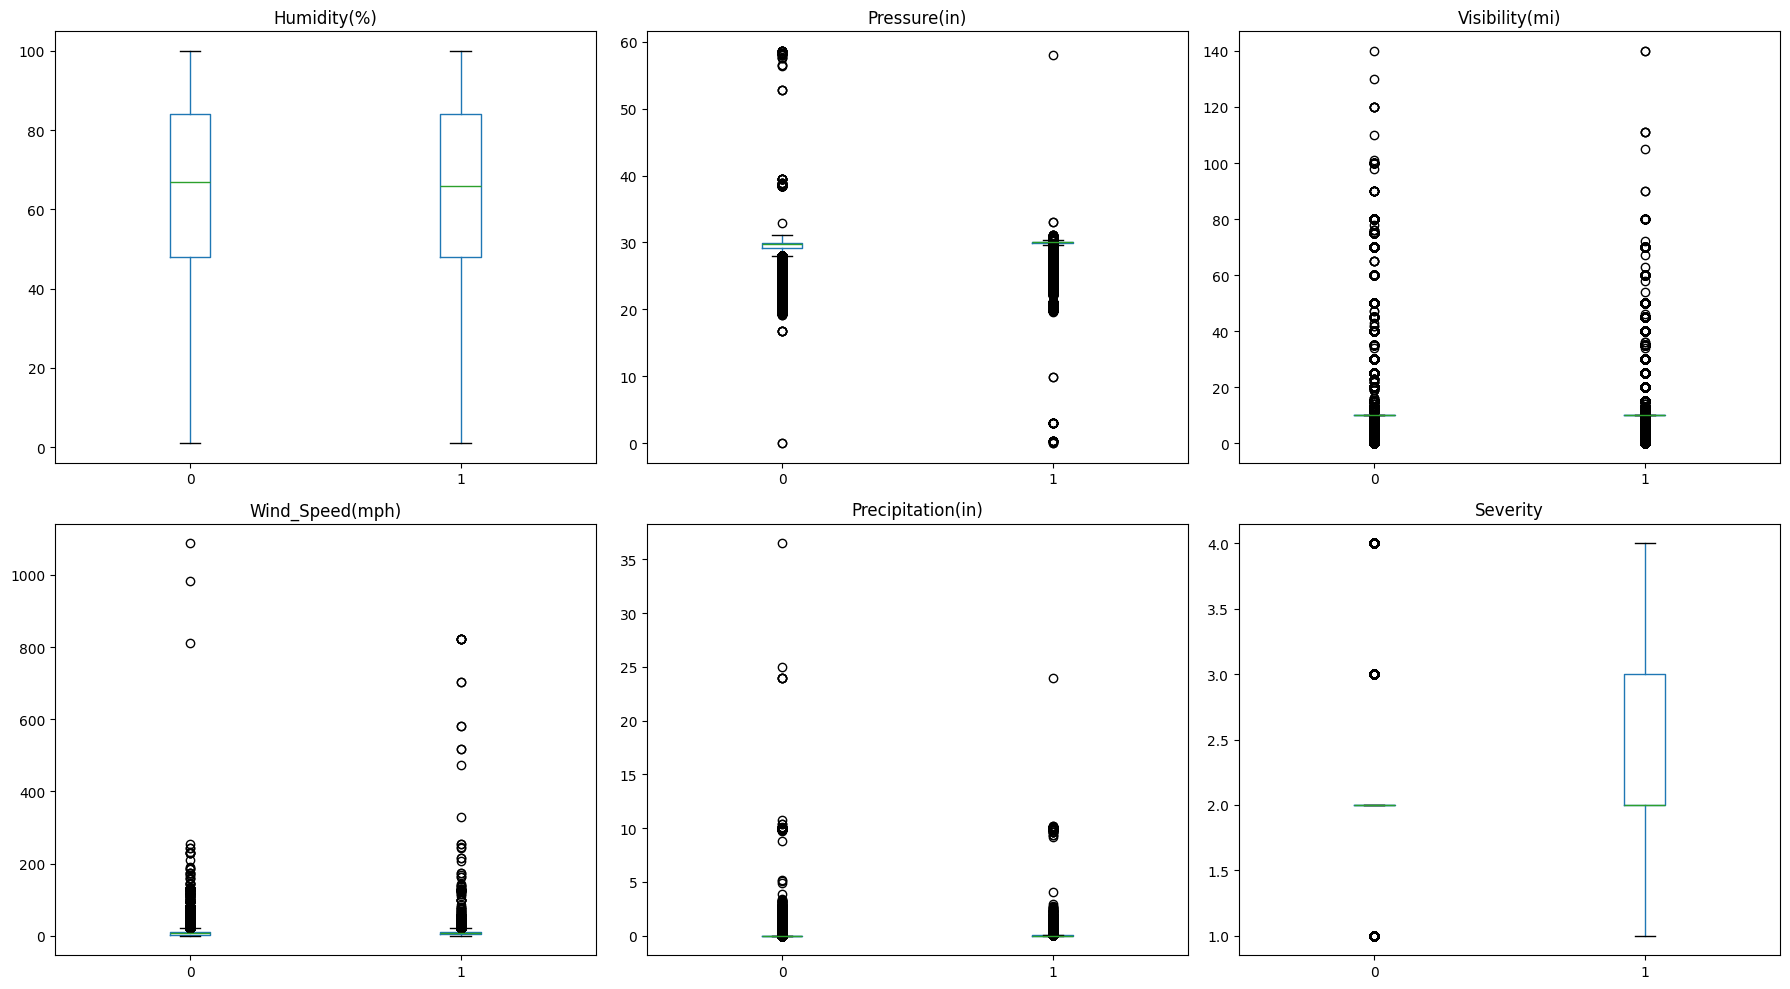

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
dfHumidity = data.pivot(columns='Missing_Wind_Chill', values=['Humidity(%)'])['Humidity(%)']
dfPressure = data.pivot(columns='Missing_Wind_Chill', values=['Pressure(in)'])['Pressure(in)']
dfVisibility = data.pivot(columns='Missing_Wind_Chill', values=['Visibility(mi)'])['Visibility(mi)']
dfWind_speed = data.pivot(columns='Missing_Wind_Chill', values=['Wind_Speed(mph)'])['Wind_Speed(mph)']
dfPrecipitation = data.pivot(columns='Missing_Wind_Chill', values=['Precipitation(in)'])['Precipitation(in)']
dfSeverity = data.pivot(columns='Missing_Wind_Chill', values=['Severity'])['Severity']

dfHumidity.boxplot(column=[0,1], ax=axes[0, 0], grid=False)
dfPressure.boxplot(column=[0,1], ax=axes[0, 1], grid=False)
dfVisibility.boxplot(column=[0,1], ax=axes[0, 2], grid=False)
dfWind_speed.boxplot(column=[0,1], ax=axes[1, 0], grid=False)
dfPrecipitation.boxplot(column=[0,1], ax=axes[1, 1], grid=False)
dfSeverity.boxplot(column=[0,1], ax=axes[1, 2], grid=False)

axes[0, 0].set_title('Humidity(%)')
axes[0, 1].set_title('Pressure(in)')
axes[0, 2].set_title('Visibility(mi)')
axes[1, 0].set_title('Wind_Speed(mph)')
axes[1, 1].set_title('Precipitation(in)')
axes[1, 2].set_title('Severity')
plt.tight_layout()
plt.show()


No particular result, Y values have more datapoints so it is coherent for them to have more outliers. However there seems to be a small correlation with Windspeed.
My assumption is that Wind speed may be a predictable variable and would be classed as MAR

### Preprocess Wind speed to all calm are 1 and others are 0

In [ ]:
data.loc[data['Wind_Direction'] == 'Calm','Calm_Wind']=1
data.loc[data['Wind_Direction'] != 'Calm','Calm_Wind']=0

In [ ]:
data['Calm_Wind'].corr(data['Missing_Wind_Chill'])

0.37884660301580997

### Conclusion: drop Wind_Chill because there is too much correlation with Wind_Direction makes more sense and is better detailed.

We can also drop precipitation as it is a useless and skewd feature according to previous studdies

In [ ]:
data = data.drop("Precipitation(in)", axis=1)

In [ ]:
data = data.drop("End_Time", axis=1)
data = data.drop("ID", axis=1)
data = data.drop("Source", axis=1)
data = data.drop("Start_Lat", axis=1)
data = data.drop("Start_Lng", axis=1)
data = data.drop("Wind_Chill(F)", axis=1)
data = data.drop("Distance(mi)", axis=1)
data = data.drop("Description", axis=1)
data = data.drop("Street", axis=1)
data = data.drop("Country", axis=1)
data = data.drop("Zipcode", axis=1)
data = data.drop("Timezone", axis=1)
data = data.drop("Airport_Code", axis=1)
data = data.drop("Weather_Timestamp", axis=1)
data = data.drop("Amenity", axis=1)
data = data.drop("Bump", axis=1)
data = data.drop("Give_Way", axis=1)
data = data.drop("No_Exit", axis=1)
data = data.drop("Railway", axis=1)
data = data.drop("Roundabout", axis=1)
data = data.drop("Traffic_Calming", axis=1)
data = data.drop("Turning_Loop", axis=1)

print(data.columns)

Index(['Severity', 'Start_Time', 'City', 'County', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Crossing',
       'Junction', 'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Missing_Wind_Chill', 'Calm_Wind'],
      dtype='object')


The following code tests the impact of variable "Text_data" (any column) with severity to check for correlation

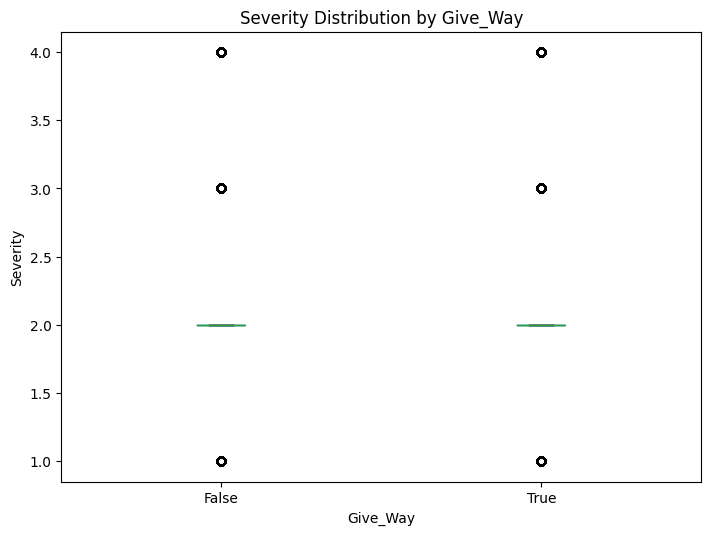

In [ ]:
Text_data = "Crossing"
fig, ax = plt.subplots(figsize=(8, 6))
data.boxplot(column="Severity", by=Text_data, ax=ax, grid=False)

ax.set_title("Severity Distribution by Give_Way")
ax.set_xlabel("Give_Way")
ax.set_ylabel("Severity")
plt.suptitle("")
plt.show()

# Methodology

1: Drop useless columns by analysing there distribution

2: twilight handling and creation of an index of sight based on twilights

3: Try T-test to check null hypothesis of knowing if a variable change has an impact on the result. Also try and find correlations with missing values and non missing values to check MAR and MCAR

In [ ]:
check_missing_values(data)

                       Missing Count  Missing Percentage
Precipitation(in)            2203586           28.512858
Wind_Speed(mph)               571233            7.391355
Visibility(mi)                177098            2.291524
Wind_Direction                175206            2.267043
Humidity(%)                   174144            2.253301
Weather_Condition             173459            2.244438
Temperature(F)                163853            2.120143
Pressure(in)                  140679            1.820288
Sunrise_Sunset                 23246            0.300787
Civil_Twilight                 23246            0.300787
Nautical_Twilight              23246            0.300787
Astronomical_Twilight          23246            0.300787
City                             253            0.003274


### convert into datetime:

In [ ]:
data["Start_Time"] = pd.to_datetime(data["Start_Time"], format='ISO8601', errors='coerce')
data["Start_Time"] = pd.to_datetime(data["Start_Time"])

## Handle missing values in twilight and sunrise in using similar timed data

In [ ]:
data = data.sort_values(by="Start_Time", ascending=True).reset_index(drop=True)

### get the next non missing value for missing data of sunrise_sunset and the others
We can do this since the sample is big enough to take the missing values of the next car crash since there are so many. The time doesn't matter since these metrics are not hourly based but luminosity based. We will later concatenate them into one clear luminosity index.

The previous version of this code would take the next minute similar time to get the values of the missing data and it almost everytime found it imediatly, so finding the current method is valid and much faster

In [ ]:
fill_cols = ["Sunrise_Sunset", "Astronomical_Twilight", "Civil_Twilight", "Nautical_Twilight"]
data[fill_cols] = data[fill_cols].fillna(method="bfill")

C:\Users\Lucas\AppData\Local\Temp\ipykernel_20424\3587944450.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[fill_cols] = data[fill_cols].fillna(method="bfill")


In [ ]:
def calculate_luminosity(row):
    night_count = sum([1 for value in [row['Sunrise_Sunset'], row['Civil_Twilight'], row['Nautical_Twilight'], row['Astronomical_Twilight']] if value == 'Night'])

    if night_count == 0:
        return 1
    elif night_count == 1:
        return 0.75
    elif night_count == 2:
        return 0.5
    elif night_count == 3:
        return 0.25
    else:
        return 0

data['Luminosity'] = data.apply(calculate_luminosity, axis=1)

In [ ]:
data['Luminosity'].describe()

count    7.728394e+06
mean     7.618733e-01
std      3.907462e-01
min      0.000000e+00
25%      5.000000e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Luminosity, dtype: float64

Now that we have the numerical luminosity index we can drop these categorical ones

In [ ]:
data = data.drop("Sunrise_Sunset", axis=1)
data = data.drop("Astronomical_Twilight", axis=1)
data = data.drop("Nautical_Twilight", axis=1)
data = data.drop("Civil_Twilight", axis=1)

In [ ]:
data = data.drop("Missing_Wind_Chill", axis=1)
data = data.drop("Calm_Wind", axis=1)
print(data.columns)

Index(['Severity', 'Start_Time', 'City', 'County', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Crossing',
       'Junction', 'Station', 'Stop', 'Traffic_Signal', 'Luminosity'],
      dtype='object')


(Try T-test to check null hypothesis of knowing if a variable change has an impact on the result?)

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

numerical_cols = data.select_dtypes(include=np.number).columns
X = data[numerical_cols].replace([np.inf, -np.inf], np.nan).dropna()
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

             Feature  VIF_Factor
0              const  777.699146
1           Severity    1.003746
2     Temperature(F)    1.287550
3        Humidity(%)    1.439568
4       Pressure(in)    1.078521
5     Visibility(mi)    1.262825
6    Wind_Speed(mph)    1.061213
7  Precipitation(in)    1.026812
8         Luminosity    1.169507


No multicolinearity on numerical features

In [ ]:
numerical_cols = data.select_dtypes(include=np.number).columns

corr = np.abs(data[numerical_cols].corr())
corr.style.background_gradient(cmap='coolwarm')

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Luminosity
Severity,1.000000,0.020327,0.022293,0.042347,0.003473,0.040214,0.021080,0.009454
Temperature(F),0.020327,1.000000,0.330939,0.109500,0.217173,0.033750,0.004633,0.290658
Humidity(%),0.022293,0.330939,1.000000,0.115573,0.384261,0.172403,0.076936,0.245765
Pressure(in),0.042347,0.109500,0.115573,1.000000,0.038161,0.022609,0.016511,0.030943
Visibility(mi),0.003473,0.217173,0.384261,0.038161,1.000000,0.014650,0.119796,0.045450
Wind_Speed(mph),0.040214,0.033750,0.172403,0.022609,0.014650,1.000000,0.024202,0.175015
Precipitation(in),0.021080,0.004633,0.076936,0.016511,0.119796,0.024202,1.000000,0.005324
Luminosity,0.009454,0.290658,0.245765,0.030943,0.045450,0.175015,0.005324,1.000000


In [ ]:
check_missing_values(data)

                   Missing Count  Missing Percentage
Precipitation(in)        2203586           28.512858
Wind_Speed(mph)           571233            7.391355
Visibility(mi)            177098            2.291524
Wind_Direction            175206            2.267043
Humidity(%)               174144            2.253301
Weather_Condition         173459            2.244438
Temperature(F)            163853            2.120143
Pressure(in)              140679            1.820288
City                         253            0.003274


In [ ]:
data.columns

Index(['Severity', 'Start_Time', 'City', 'County', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Crossing',
       'Junction', 'Station', 'Stop', 'Traffic_Signal', 'Luminosity'],
      dtype='object')

# Use logistic regression on Precipitation
To check if missingness is due to another variable

In [ ]:
len(data['County'].unique())

1871

### Encoding County to get numerical values out of it using mean's severity
First we need to clean this row as we have a lot of low occurence counties that don't have enough reccords

In [ ]:
# how many rows a county must have to be kept
threshold = 1000

county_counts = data['County'].value_counts()
counties_to_keep = county_counts[county_counts >= threshold].index
data['County_cleaned'] = data['County'].apply(
    lambda x: x if x in counties_to_keep else 'Unknown'
)
data['County_cleaned'] = data['County_cleaned'].fillna('Unknown')

In [ ]:
len(data['County_cleaned'].unique())

551

In [ ]:
county_severity = data.groupby('County_cleaned')['Severity'].mean().sort_values()
print(county_severity.head(10))
print(county_severity.tail(10))

County_cleaned
Pima            1.967502
Williamsburg    1.983363
Saluda          1.987490
Georgetown      1.994065
Pickens         1.995956
Marlboro        1.997144
Barnstable      2.002504
Kandiyohi       2.003828
Horry           2.004170
Wichita         2.005525
Name: Severity, dtype: float64
County_cleaned
Coweta              2.631253
Ellis               2.632252
Newton              2.639315
St. Louis County    2.646833
Weld                2.650890
Tolland             2.682288
Will                2.690105
St. Louis City      2.699533
Galveston           2.745704
Windham             2.746507
Name: Severity, dtype: float64


Even with cleaning done, we can see that some counties hold a much higher severity index than others. We should thus keep this feature and target encode it without provoking data leakage.

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_score = cramers_v(data['County_cleaned'], data['Severity'])
print("Cramér's V between County and Severity:", cramers_v_score)

Cramér's V between County and Severity: 0.21229810071767144


In [ ]:
data = data.drop('County', axis=1, inplace=True)

shows that there is an association between County and Severity but that it is low, we can thus use some sort of target encoding

## K fold implementation for target encoding future usage

In [ ]:
from sklearn.model_selection import KFold
from category_encoders import TargetEncoder


kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = data.copy()
y = X.pop('Severity')
X['County_encoded'] = np.nan
for train_idx, val_idx in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold = y.iloc[train_idx]
    encoder = TargetEncoder(cols=['County_cleaned'])
    encoder.fit(X_train_fold, y_train_fold)
    X.loc[val_idx, 'County_encoded'] = encoder.transform(X.iloc[val_idx])['County_cleaned']

this way we won't introduce data leakage while trying to target the severity with the county

In [ ]:
data.columns

Index(['Severity', 'Start_Time', 'City', 'County', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Crossing', 'Junction',
       'Station', 'Stop', 'Traffic_Signal', 'Luminosity', 'Missing',
       'County_cleaned'],
      dtype='object')

In [ ]:
check_missing_values(data)

                   Missing Count  Missing Percentage
Wind_Speed(mph)           571233            7.391355
Visibility(mi)            177098            2.291524
Wind_Direction            175206            2.267043
Humidity(%)               174144            2.253301
Weather_Condition         173459            2.244438
Temperature(F)            163853            2.120143
Pressure(in)              140679            1.820288
City                         253            0.003274


### TEST MCAR ON Wind_Speed

most likely an issue in the code since the p value is way too low. We will have to stick with checking the correlation and VIF

In [ ]:
data.loc[data['Wind_Speed(mph)'].isnull()==True,'Wind_Speed(mph)_Missing']="Y"
data.loc[data['Wind_Speed(mph)'].isnull()==False,'Wind_Speed(mph)_Missing']="N"

<Axes: >

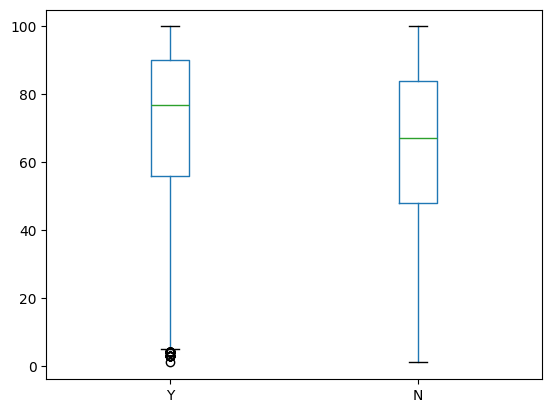

In [ ]:
dfassign=data.pivot(columns = 'Wind_Speed(mph)_Missing',values=['Humidity(%)'])['Humidity(%)']

dfassign.boxplot(column=['Y','N'],grid=False)

In [ ]:
data = data.drop("Wind_Speed(mph)_Missing", axis=1)

This unfortunatly indicate that wind_speed might be MAR

In [ ]:
numerical_cols = data.select_dtypes(include=np.number).columns

corr = np.abs(data[numerical_cols].corr())
corr.style.background_gradient(cmap='coolwarm')

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Luminosity,Missing
Severity,1.000000,0.020327,0.022293,0.042347,0.003473,0.040214,0.009454,0.180533
Temperature(F),0.020327,1.000000,0.330939,0.109500,0.217173,0.033750,0.290658,0.024232
Humidity(%),0.022293,0.330939,1.000000,0.115573,0.384261,0.172403,0.245765,0.056448
Pressure(in),0.042347,0.109500,0.115573,1.000000,0.038161,0.022609,0.030943,0.266408
Visibility(mi),0.003473,0.217173,0.384261,0.038161,1.000000,0.014650,0.045450,0.087512
Wind_Speed(mph),0.040214,0.033750,0.172403,0.022609,0.014650,1.000000,0.175015,0.084818
Luminosity,0.009454,0.290658,0.245765,0.030943,0.045450,0.175015,1.000000,0.060201
Missing,0.180533,0.024232,0.056448,0.266408,0.087512,0.084818,0.060201,1.000000


In [ ]:
data['City'] = data['City'].fillna('Unknown')

## Test the imputation on Wind_speed

### imputation results:

Multivariate imputation best score for wind speed is : R² Score: 0.0559 using features = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Luminosity',
       'County_encoded']. Unconclusive results, will try another imputation.

In [ ]:
numerical_cols = data.select_dtypes(include=np.number).columns
corr = np.abs(data[numerical_cols].corr())
corr.style.background_gradient(cmap='coolwarm')

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Luminosity,Missing
Severity,1.000000,0.020327,0.022293,0.042347,0.003473,0.040214,0.009454,0.180533
Temperature(F),0.020327,1.000000,0.330939,0.109500,0.217173,0.033750,0.290658,0.024232
Humidity(%),0.022293,0.330939,1.000000,0.115573,0.384261,0.172403,0.245765,0.056448
Pressure(in),0.042347,0.109500,0.115573,1.000000,0.038161,0.022609,0.030943,0.266408
Visibility(mi),0.003473,0.217173,0.384261,0.038161,1.000000,0.014650,0.045450,0.087512
Wind_Speed(mph),0.040214,0.033750,0.172403,0.022609,0.014650,1.000000,0.175015,0.084818
Luminosity,0.009454,0.290658,0.245765,0.030943,0.045450,0.175015,1.000000,0.060201
Missing,0.180533,0.024232,0.056448,0.266408,0.087512,0.084818,0.060201,1.000000




Need to check if missisngness is correlated to each other.

In [ ]:
missing_A = data['Wind_Direction'].isnull().astype(int)
missing_B = data['Pressure(in)'].isnull().astype(int)
correlation = missing_A.corr(missing_B)
print(f"Pearson corelation between missing-ness of A and B: {correlation:.2f}")

Pearson correlation between missingness of A and B: 0.80


By checking manually, Visibility(mi)
Wind_Direction
Humidity(%)
Weather_Condition
Temperature(F)
Pressure(in) are all missingly correlated (absence of one is highly likey to include absence of another.) => They are all **MAR**

We will thus use Multivariate imputation.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

cols_to_impute = ['Visibility(mi)', 'Humidity(%)', 'Temperature(F)', 'Pressure(in)', ]
df_numeric = data[cols_to_impute]
bounds = {
    col: (df_numeric[col].min(), df_numeric[col].max())
    for col in cols_to_impute
}

imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
df_imputed = imputer.fit_transform(df_numeric)
for i, col in enumerate(cols_to_impute):
    df_imputed[:, i] = np.clip(
        df_imputed[:, i],
        bounds[col][0],
        bounds[col][1]
    )

data[cols_to_impute] = df_imputed

In [ ]:
data['Wind_Direction'].fillna(data['Wind_Direction'].mode()[0], inplace=True)
data['Weather_Condition'].fillna(data['Weather_Condition'].mode()[0], inplace=True)

In [ ]:
print(data.columns)

Index(['Severity', 'Start_Time', 'City', 'County', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Crossing', 'Junction',
       'Station', 'Stop', 'Traffic_Signal', 'Luminosity', 'Missing',
       'County_cleaned'],
      dtype='object')


## Outlier detection

remove outliers for precipitation(in) using quartile per State, as most statistics change according to the state


In [ ]:
def replace_outliers_iqr_by_state(data, column):
    def replace_group(series):
        Q1 = series.quantile(0.20)
        Q3 = series.quantile(0.80)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        median = series.median()
        series[(series < lower) | (series > upper)] = median
        return series
    data[column] = data.groupby('State', group_keys=False)[column].apply(replace_group)
    return data
variable2 = "Pressure(in)"

data6 = replace_outliers_iqr_by_state(data.copy(), variable2)

In [ ]:
variable2 = "Temperature(F)"
data6 = replace_outliers_iqr_by_state(data.copy(), variable2)

For precipitation, made sure that not all outliers were rejected as the quartile took away waaaay too much data from precipitation since most of the values were 0. A max of 1.4 for precipitation made the most sense (find a paper to prove that point pls)

In [ ]:
variable2 = "Humidity(%)"
data6 = replace_outliers_iqr_by_state(data.copy(), variable2)
variable2 = "Visibility(mi)"
data6 = replace_outliers_iqr_by_state(data.copy(), variable2)

In [ ]:
data = data6

In [ ]:
check_missing_values(data)

                 Missing Count  Missing Percentage
Wind_Speed(mph)         571233            7.391355


In [ ]:
data.columns

Index(['Severity', 'Start_Time', 'City', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Crossing', 'Junction',
       'Station', 'Stop', 'Traffic_Signal', 'Luminosity', 'County_cleaned'],
      dtype='object')

In [ ]:
data.drop('Missing', axis=1, inplace=True)

# Succesful Imputation of wind speed

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

def impute_wind_speed(data_clean):

    data_clean = data_clean.dropna(subset=['Weather_Condition', 'Humidity(%)', 'Temperature(F)', 'Pressure(in)', 'Wind_Direction'])

    train_data = data_clean.dropna(subset=['Wind_Speed(mph)'])

    features = ['Humidity(%)', 'Weather_Condition', 'Temperature(F)', 'Pressure(in)', 'Wind_Direction', 'County_cleaned']
    X_train = train_data[features].copy()
    y_train = train_data['Wind_Speed(mph)']


    preprocessor = ColumnTransformer(
        transformers=[
            ('weather', OneHotEncoder(handle_unknown='ignore'), ['Weather_Condition']),
            ('humidity', 'passthrough', ['Humidity(%)']),
            ('temperature', 'passthrough', ['Temperature(F)']),
            ('pressure', 'passthrough', ['Pressure(in)']),
            ('wind_direction', OneHotEncoder(handle_unknown='ignore'), ['Wind_Direction'])
        ])


    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])


    model.fit(X_train, y_train)

    print("Model Intercept:", model.named_steps['regressor'].intercept_)

    y_train_pred = model.predict(X_train)

    r2 = r2_score(y_train, y_train_pred)
    mse = mean_squared_error(y_train, y_train_pred)
    print("Mean Squared Error (Training Set):", mse)
    print("features were ", features)

    missing_data = data_clean[data_clean['Wind_Speed(mph)'].isnull()]
    X_missing = missing_data[['Humidity(%)', 'Weather_Condition', 'Temperature(F)', 'Pressure(in)', 'Wind_Direction']]
    predicted_wind_speed = model.predict(X_missing)
    data_clean.loc[data_clean['Wind_Speed(mph)'].isnull(), 'Wind_Speed(mph)'] = predicted_wind_speed
    return data_clean

data2 = impute_wind_speed(data)

Model Intercept: 15.803899301379332
Mean Squared Error (Training Set): 14.954833395701442
features were  ['Humidity(%)', 'Weather_Condition', 'Temperature(F)', 'Pressure(in)', 'Wind_Direction', 'County_cleaned']


In [ ]:
print(data2.columns)

Index(['Severity', 'Start_Time', 'City', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Crossing', 'Junction',
       'Station', 'Stop', 'Traffic_Signal', 'Luminosity', 'County_cleaned'],
      dtype='object')


In [ ]:
data2.to_csv('data2.csv', index=False)

# Check linearity of data to know if PCA or Autoencoder would be best

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
numerical_data = data2.select_dtypes(include=['float64', 'int64'])
numerical_cols = numerical_data.columns


df_num = data2[numerical_cols].dropna()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=numerical_cols)

r2_scores = {}

for target in numerical_cols:
    features = [col for col in numerical_cols if col != target]
    X = df_scaled[features]
    y = df_scaled[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores[target] = r2

In [ ]:
for col, score in r2_scores.items():
    print(f"R² for predicting {col}: {score:.3f}")

R² for predicting Severity: 0.004
R² for predicting Temperature(F): 0.197
R² for predicting Humidity(%): 0.185
R² for predicting Pressure(in): 0.044
R² for predicting Visibility(mi): 0.059
R² for predicting Wind_Speed(mph): 0.051
R² for predicting Luminosity: 0.126


no linearity with numerical, so no PCA, use autoencoder

In [ ]:
categorical_data = data2.drop(numerical_cols, axis=1)
for col in categorical_data.columns:
    print("col ", col, " has ", len(categorical_data[col].unique()))

col  Start_Time  has  5801064
col  City  has  13679
col  State  has  49
col  Wind_Direction  has  24
col  Weather_Condition  has  144
col  Crossing  has  2
col  Junction  has  2
col  Station  has  2
col  Stop  has  2
col  Traffic_Signal  has  2
col  County_cleaned  has  551


## Reduce size of data due to lack of computable power

Load the preprocessed data

In [ ]:
data2 = pd.read_csv('data2.csv')

K-Folding encoding

In [ ]:
from sklearn.model_selection import KFold
from category_encoders import TargetEncoder

kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = data2.copy()
y = X.pop('Severity')

X['K_fold_County_encoded'] = np.nan

for train_idx, val_idx in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold = y.iloc[train_idx]

    encoder = TargetEncoder(cols=['County_cleaned'])
    encoder.fit(X_train_fold, y_train_fold)

    X.loc[val_idx, 'K_fold_County_encoded'] = encoder.transform(X.iloc[val_idx])['County_cleaned']

In [ ]:
check_missing_values(X)

Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [ ]:
print(X.columns)

Index(['Severity', 'Start_Time', 'City', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Crossing', 'Junction',
       'Station', 'Stop', 'Traffic_Signal', 'Luminosity',
       'K_fold_County_encoded'],
      dtype='object')


In [ ]:
# data2['K_fold_County_encoded'] = np.nan
data2['K_fold_County_encoded'] = X['K_fold_County_encoded']
data2 = data2.drop(columns=['County_cleaned'])
data2 = data2.fillna(np.mean(data2['K_fold_County_encoded']))

In [ ]:
print(data2.columns, "\n", data2.shape)

Index(['Severity', 'Start_Time', 'City', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Crossing', 'Junction',
       'Station', 'Stop', 'Traffic_Signal', 'Luminosity', 'County_cleaned',
       'K_fold_County_encoded'],
      dtype='object') 
 (7728394, 19)


# trying DBSCAN on state to reduce dataset

Not leaving the code here but it was not successful at all

## K mean test to reduce State or county

In [ ]:
from sklearn.cluster import KMeans

state_features = data2.groupby('State').agg({
    'Severity': ['mean', 'count'],
    'Temperature(F)': 'mean',
    'Humidity(%)': 'mean',
    'Visibility(mi)': 'mean',
}).fillna(0)

state_features.columns = ['_'.join(col).strip() for col in state_features.columns.values]
scaler = StandardScaler()
scaled = scaler.fit_transform(state_features)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled)
state_cluster_map = pd.Series(clusters, index=state_features.index).to_dict()
data2['StateCluster'] = data2['State'].map(state_cluster_map)

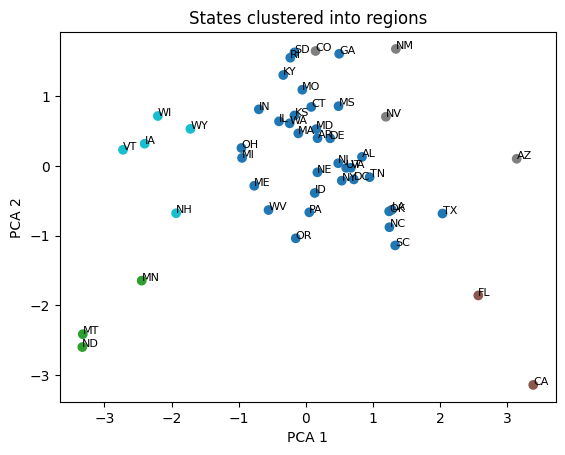

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='tab10')
for i, state in enumerate(state_features.index):
    plt.text(pca_data[i, 0], pca_data[i, 1], state, fontsize=8)
plt.title("States clustered into regions")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled, clusters)
print(f"Silhouette score: {score:.2f}")

Silhouette score: 0.38


not the worst results, but definitly not the best. Might be usable, will test it later

### balance the dataset, upsampling the minority according to the state to balance both severity and state
This allows us to keep a "plausible" dataset since we still keep the category 2 as the major one

In [ ]:
from sklearn.utils import resample
def reduce_majoritary(data, target_column='Severity', balance_columns=None,
                      max_samples_per_group=5000, upsample_minorities=True, upsample_target_counts=3000):
    majority_class = 2
    minority_classes = data[target_column].unique().tolist()
    minority_classes = [cls for cls in minority_classes if cls != majority_class]

    df_majority = data[data[target_column] == majority_class]
    if balance_columns:
        grouped = df_majority.groupby(balance_columns)
        downsampled_groups = [
            resample(group,
                     replace=False,
                     n_samples=min(len(group), max_samples_per_group),
                     random_state=42)
            for _, group in grouped
        ]
        df_majority_balanced = pd.concat(downsampled_groups)
    else:
        df_majority_balanced = resample(df_majority,
                                        replace=False,
                                        n_samples=max_samples_per_group * 10,
                                        random_state=42)


    minority_dfs = []
    for cls in minority_classes:
        df_cls = data[data[target_column] == cls]
        if upsample_minorities:
            target_n = upsample_target_counts if isinstance(upsample_target_counts, int) else upsample_target_counts.get(cls, len(df_cls))
            if balance_columns:
                grouped = df_cls.groupby(balance_columns)
                upsampled_groups = []
                for _, group in grouped:
                    n_samples = min(len(group), target_n)
                    upsampled = resample(group,
                                         replace=True,
                                         n_samples=n_samples,
                                         random_state=42)
                    upsampled_groups.append(upsampled)
                df_cls_upsampled = pd.concat(upsampled_groups)
            else:
                df_cls_upsampled = resample(df_cls,
                                            replace=True,
                                            n_samples=target_n,
                                            random_state=42)
            minority_dfs.append(df_cls_upsampled)
        else:
            minority_dfs.append(df_cls)

    final_df = pd.concat([df_majority_balanced] + minority_dfs).sample(frac=1, random_state=42).reset_index(drop=True)
    return final_df

balanced_df = reduce_majoritary(data2, target_column='Severity', balance_columns=['State'])

print("\nBalanced distribution:")
print(balanced_df['Severity'].value_counts())
print(balanced_df['Severity'].value_counts()/balanced_df.shape[0])
print(data2['Severity'].value_counts()/data2.shape[0])


Balanced distribution:
Severity
2    229579
3    117106
4     91246
1     44948
Name: count, dtype: int64
Severity
2    0.475438
3    0.242516
4    0.188962
1    0.093083
Name: count, dtype: float64
Severity
2    0.796670
3    0.168125
4    0.026488
1    0.008717
Name: count, dtype: float64


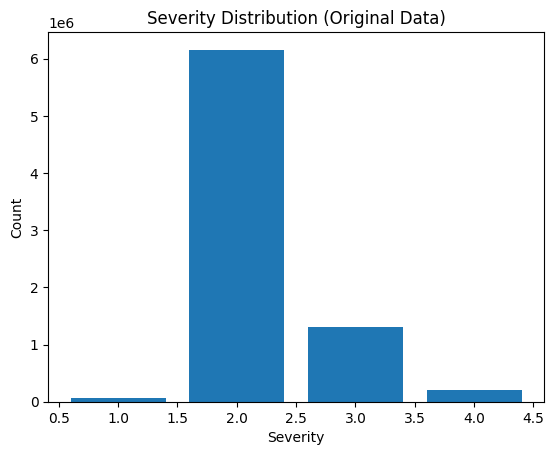

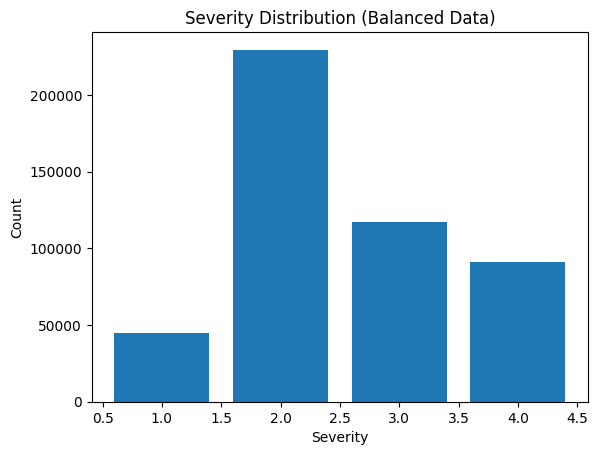

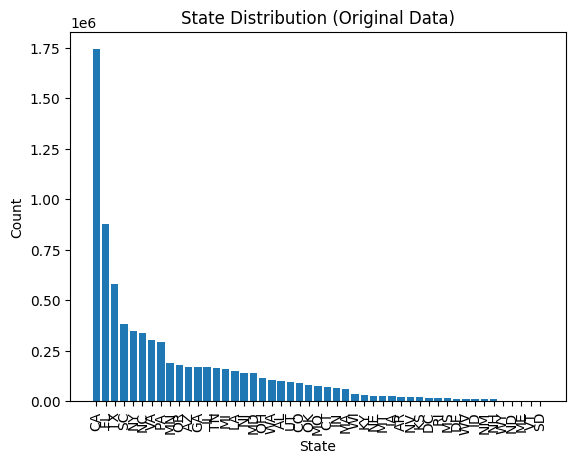

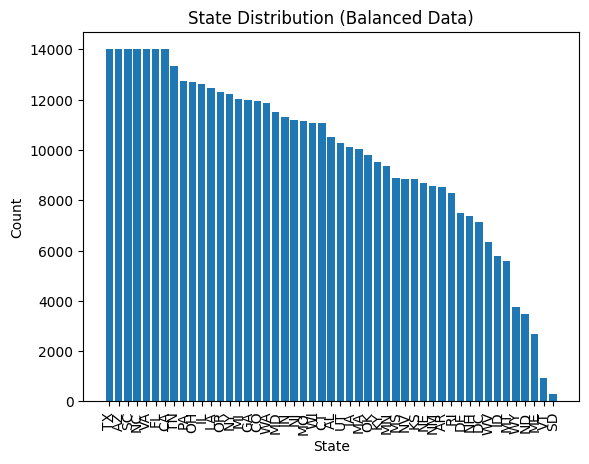

In [ ]:
plt.figure()
severity_counts = data2['Severity'].value_counts()
plt.bar(severity_counts.index, severity_counts.values)
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Severity Distribution (Original Data)')

plt.figure()
severity_counts = balanced_df['Severity'].value_counts()
plt.bar(severity_counts.index, severity_counts.values)
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Severity Distribution (Balanced Data)')

plt.figure()
state_counts = data2['State'].value_counts()
plt.bar(state_counts.index, state_counts.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Distribution (Original Data)')
plt.xticks(rotation=90)

plt.figure()
state_counts = balanced_df['State'].value_counts()
plt.bar(state_counts.index, state_counts.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Distribution (Balanced Data)')
plt.xticks(rotation=90)

plt.show()

## Use auto-encoding on categorical variables

One last VIF test

In [ ]:
numerical_cols = balanced_df.select_dtypes(include=np.number).columns
X = balanced_df[numerical_cols].replace([np.inf, -np.inf], np.nan).dropna()
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                 Feature  VIF_Factor
0                  const  845.487887
1               Severity    1.087767
2         Temperature(F)    1.278045
3            Humidity(%)    1.322365
4           Pressure(in)    1.172406
5         Visibility(mi)    1.133650
6        Wind_Speed(mph)    1.065465
7             Luminosity    1.143646
8  K_fold_County_encoded    1.085753
9           StateCluster    1.198154


Autoencoder was tested on multiple columns, here we kept some categorical columns except state and county as their encoding was shown later to be one of the best encoded features

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset


embedding_cols = ['City', 'Weather_Condition']
low_card_cols = ['Crossing', 'Junction', 'Station', 'Stop', 'Traffic_Signal', 'Wind_Direction']

encoders = {}
X_embed = pd.DataFrame()

for col in embedding_cols:
    le = LabelEncoder()
    X_embed[col] = le.fit_transform(balanced_df[col].astype(str))
    encoders[col] = le

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_low_card = pd.DataFrame(
    ohe.fit_transform(balanced_df[low_card_cols]),
    columns=ohe.get_feature_names_out(low_card_cols)
)
from sklearn.preprocessing import MinMaxScaler


X_total = pd.concat([X_embed.reset_index(drop=True), X_low_card.reset_index(drop=True)], axis=1)

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_total), columns=X_total.columns)
X_tensor = torch.tensor(X_scaled.values, dtype=torch.float32)

dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)

class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=20):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z), z

input_dim = X_total.shape[1]
latent_dim = 8
model = Autoencoder(input_dim, latent_dim)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 30
model.train()

for epoch in range(n_epochs):
    total_loss = 0
    for batch in dataloader:
        x = batch[0].to(device)
        optimizer.zero_grad()
        x_recon, _ = model(x)
        loss = criterion(x_recon, x)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {total_loss:.2f}")

model.eval()
with torch.no_grad():
    _, latent = model(X_tensor.to(device))

X_latent = latent.cpu().numpy()
X_latent_df = pd.DataFrame(X_latent, columns=[f'latent_{i}' for i in range(latent_dim)])

Epoch 1/30, Loss: 23.02
Epoch 2/30, Loss: 1.13
Epoch 3/30, Loss: 0.71
Epoch 4/30, Loss: 0.46
Epoch 5/30, Loss: 0.35
Epoch 6/30, Loss: 0.31
Epoch 7/30, Loss: 0.31
Epoch 8/30, Loss: 0.31
Epoch 9/30, Loss: 0.31
Epoch 10/30, Loss: 0.30
Epoch 11/30, Loss: 0.30
Epoch 12/30, Loss: 0.30
Epoch 13/30, Loss: 0.30
Epoch 14/30, Loss: 0.30
Epoch 15/30, Loss: 0.30
Epoch 16/30, Loss: 0.30
Epoch 17/30, Loss: 0.29
Epoch 18/30, Loss: 0.29
Epoch 19/30, Loss: 0.29
Epoch 20/30, Loss: 0.29
Epoch 21/30, Loss: 0.29
Epoch 22/30, Loss: 0.29
Epoch 23/30, Loss: 0.29
Epoch 24/30, Loss: 0.28
Epoch 25/30, Loss: 0.28
Epoch 26/30, Loss: 0.28
Epoch 27/30, Loss: 0.28
Epoch 28/30, Loss: 0.28
Epoch 29/30, Loss: 0.28
Epoch 30/30, Loss: 0.28


In [ ]:
model.eval()
with torch.no_grad():
    X_encoded = model.encoder(X_tensor.to(device)).cpu().numpy()
torch.save(model.state_dict(), "autoencoder_model.pt")

we are going to compare the output of the autoencoder with the encoding of categorical features

In [ ]:
print(balanced_df.columns)

Index(['Severity', 'Start_Time', 'City', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Crossing', 'Junction',
       'Station', 'Stop', 'Traffic_Signal', 'Luminosity',
       'K_fold_County_encoded', 'StateCluster'],
      dtype='object')


In [ ]:
embedding_cols = ['City', 'State', 'Weather_Condition']
low_card_cols = ['Crossing', 'Junction', 'Station', 'Stop', 'Traffic_Signal', 'Luminosity']

X_embed = pd.DataFrame()
X_low_card = pd.DataFrame()
for col in embedding_cols:
    le = LabelEncoder()
    X_embed[col] = le.fit_transform(balanced_df[col].astype(str))
    encoders[col] = le

low_card_encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
X_low_card = pd.DataFrame(
    low_card_encoder.fit_transform(balanced_df[low_card_cols]),
    columns=low_card_encoder.get_feature_names_out(low_card_cols)
)

print(X_low_card.columns)
print(X_embed.columns)


categorical_cols = pd.concat([X_embed.reset_index(drop=True), X_low_card.reset_index(drop=True)], axis=1)

X_orig = pd.concat([balanced_df[numerical_cols], categorical_cols], axis=1)  # Merge with numerical columns
y_orig = balanced_df['Severity']

Index(['Crossing_True', 'Junction_True', 'Station_True', 'Stop_True',
       'Traffic_Signal_True', 'Luminosity_0.0', 'Luminosity_0.25',
       'Luminosity_0.5', 'Luminosity_0.75', 'Luminosity_1.0'],
      dtype='object')
Index(['City', 'State', 'Weather_Condition'], dtype='object')


### RF on autoencoder only

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_latent_df, balanced_df['Severity'], test_size=0.2, random_state=42,  stratify=balanced_df['Severity'])

clf = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6257  1549   638   546]
 [ 5034 23729 10451  6702]
 [ 1711  6476 12173  3061]
 [ 1180  4640  2958  9471]]
              precision    recall  f1-score   support

           1       0.44      0.70      0.54      8990
           2       0.65      0.52      0.58     45916
           3       0.46      0.52      0.49     23421
           4       0.48      0.52      0.50     18249

    accuracy                           0.53     96576
   macro avg       0.51      0.56      0.53     96576
weighted avg       0.55      0.53      0.54     96576



C:\Users\Lucas\AppData\Local\Temp\ipykernel_25184\3486150758.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')


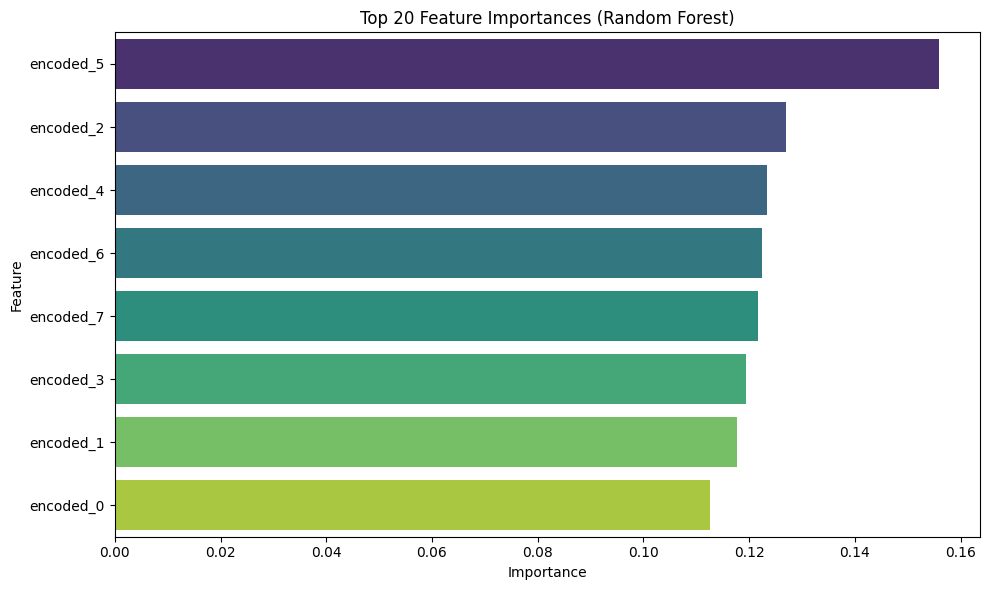

In [ ]:
importances = clf.feature_importances_
encoded_df = pd.DataFrame(X_train, columns=[f"encoded_{i}" for i in range(X_train.shape[1])])
feature_names = encoded_df.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

Not too bad since we only used categorical variables with the autoencoder.

#### Using numerical values only on Random Forest

In [ ]:
numerical_cols = numerical_cols.drop('Severity')
X_orig = balanced_df[numerical_cols]

y_orig = balanced_df['Severity']

X_train, X_test, y_train, y_test = train_test_split(
    X_orig, y_orig,
    test_size=0.2,
    random_state=42,
    stratify=y_orig
)

clf = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6579  1960   314   137]
 [ 1247 36745  5170  2754]
 [  479 11466 10153  1323]
 [  229  5953  1436 10631]]
              precision    recall  f1-score   support

           1       0.77      0.73      0.75      8990
           2       0.65      0.80      0.72     45916
           3       0.59      0.43      0.50     23421
           4       0.72      0.58      0.64     18249

    accuracy                           0.66     96576
   macro avg       0.68      0.64      0.65     96576
weighted avg       0.66      0.66      0.66     96576



As expected, numerical alone is not that good

Test RF model only using encoded categories + numerical without autoencoder With and without the Clustered State feature

In [ ]:
# X_combined = pd.concat([categorical_cols, balanced_df['County_cleaned']], axis=1)

X_orig = pd.concat([balanced_df[numerical_cols], categorical_cols], axis=1)

y_orig = balanced_df['Severity']

X_train, X_test, y_train, y_test = train_test_split(
    X_orig, y_orig,
    test_size=0.2,
    random_state=42,
    stratify=y_orig
)

clf = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6777  1842   264   107]
 [ 1264 37028  5253  2371]
 [  349  9276 12536  1260]
 [  207  5585  1579 10878]]
              precision    recall  f1-score   support

           1       0.79      0.75      0.77      8990
           2       0.69      0.81      0.74     45916
           3       0.64      0.54      0.58     23421
           4       0.74      0.60      0.66     18249

    accuracy                           0.70     96576
   macro avg       0.72      0.67      0.69     96576
weighted avg       0.70      0.70      0.69     96576



In [ ]:
X_orig = pd.concat([balanced_df[numerical_cols], categorical_cols], axis=1)

X_orig2 = X_orig.drop(['State'], axis=1)
X_orig2 = pd.concat([X_orig2, balanced_df['StateCluster']], axis=1)
y_orig = balanced_df['Severity']

X_train, X_test, y_train, y_test = train_test_split(
    X_orig2, y_orig,
    test_size=0.2,
    random_state=42,
    stratify=y_orig
)

clf = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6652  2018   236    84]
 [ 1198 37213  5234  2271]
 [  324 10034 11974  1089]
 [  173  6123  1628 10325]]
              precision    recall  f1-score   support

           1       0.80      0.74      0.77      8990
           2       0.67      0.81      0.73     45916
           3       0.63      0.51      0.56     23421
           4       0.75      0.57      0.64     18249

    accuracy                           0.69     96576
   macro avg       0.71      0.66      0.68     96576
weighted avg       0.69      0.69      0.68     96576



C:\Users\Lucas\AppData\Local\Temp\ipykernel_25184\3340321716.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')


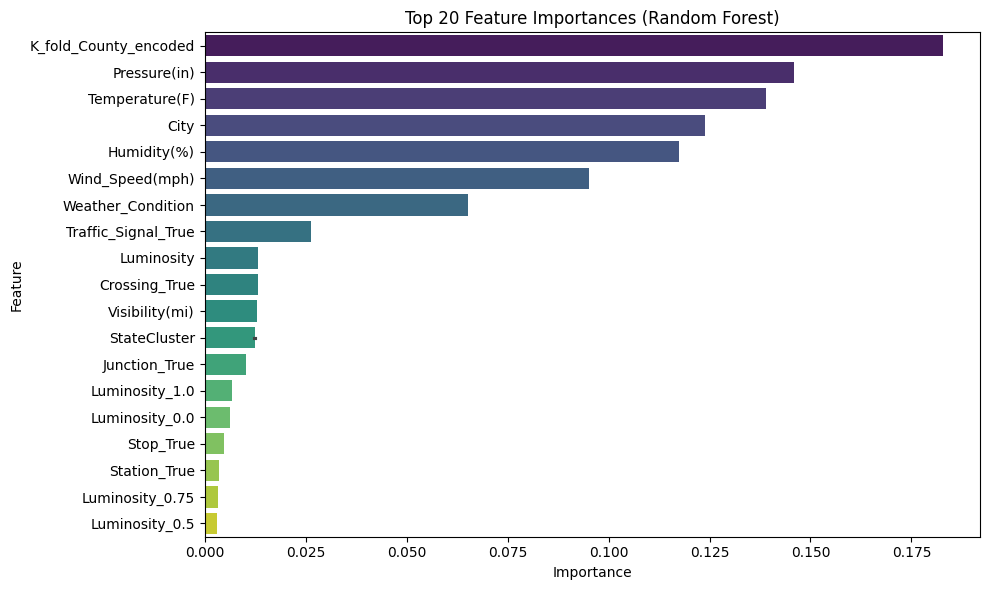

In [ ]:
importances = clf.feature_importances_

feature_names = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

## Try fusing autoencoder on some categorical values and keep the most important values as is

In [ ]:
numerical_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)']
cat_cols = ['City', 'State']
X_orig = balanced_df[numerical_cols]

X_combined = pd.concat([X_latent_df, X_embed.drop(['Weather_Condition'], axis=1)], axis=1)
X_orig = pd.concat([X_orig, X_combined], axis=1)

y_orig = balanced_df['Severity']

X_train, X_test, y_train, y_test = train_test_split(
    X_orig, y_orig,
    test_size=0.2,
    random_state=42,
    stratify=y_orig
)

clf = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6271  2331   255   133]
 [ 1174 36885  5755  2102]
 [  391 10713 11338   979]
 [  256  6680  1746  9567]]
              precision    recall  f1-score   support

           1       0.77      0.70      0.73      8990
           2       0.65      0.80      0.72     45916
           3       0.59      0.48      0.53     23421
           4       0.75      0.52      0.62     18249

    accuracy                           0.66     96576
   macro avg       0.69      0.63      0.65     96576
weighted avg       0.67      0.66      0.66     96576



C:\Users\Lucas\AppData\Local\Temp\ipykernel_25184\1179763686.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')


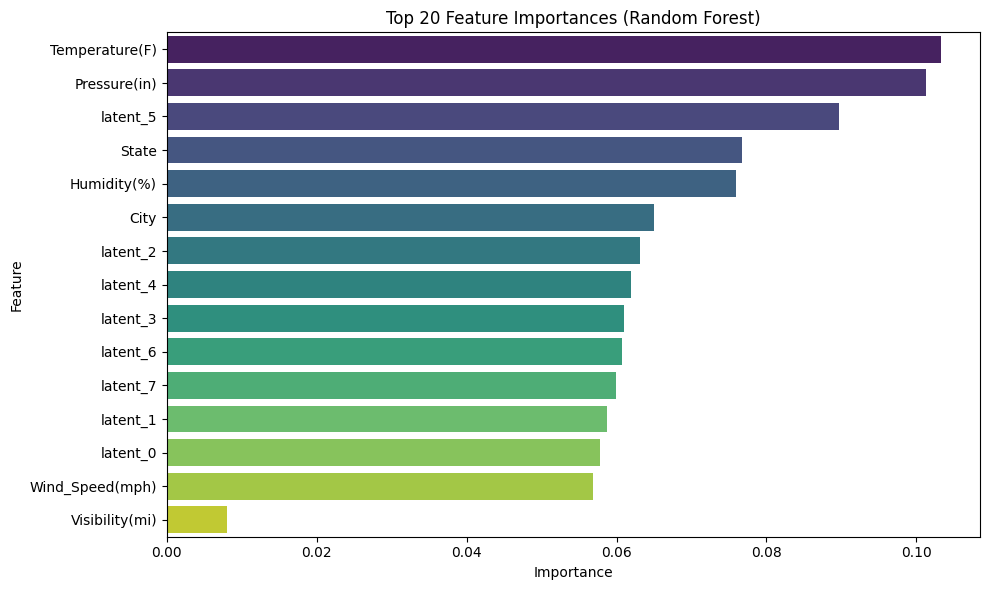

In [ ]:
importances = clf.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

# Last test on RF
Take only the top 5 features

In [ ]:
# X_combined = pd.concat([categorical_cols, balanced_df['County_cleaned']], axis=1)

X_orig = pd.concat([balanced_df[numerical_cols], categorical_cols], axis=1)
kept_features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)',  'Wind_Speed(mph)', 'City', 'State', 'Weather_Condition']
X_orig2 = X_orig[kept_features]
X_orig2 = pd.concat([X_orig2, balanced_df['Luminosity']], axis=1)
X_orig2 = pd.concat([X_orig2, balanced_df['K_fold_County_encoded']], axis=1)
y_orig = balanced_df['Severity']
X_train, X_test, y_train, y_test = train_test_split(
    X_orig2, y_orig,
    test_size=0.2,
    random_state=42,
    stratify=y_orig
)

clf = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6832  1747   293   118]
 [ 1342 36715  5208  2651]
 [  485 10249 11381  1306]
 [  236  5469  1416 11128]]
              precision    recall  f1-score   support

           1       0.77      0.76      0.76      8990
           2       0.68      0.80      0.73     45916
           3       0.62      0.49      0.55     23421
           4       0.73      0.61      0.67     18249

    accuracy                           0.68     96576
   macro avg       0.70      0.66      0.68     96576
weighted avg       0.68      0.68      0.68     96576



C:\Users\Lucas\AppData\Local\Temp\ipykernel_25184\2142037762.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')


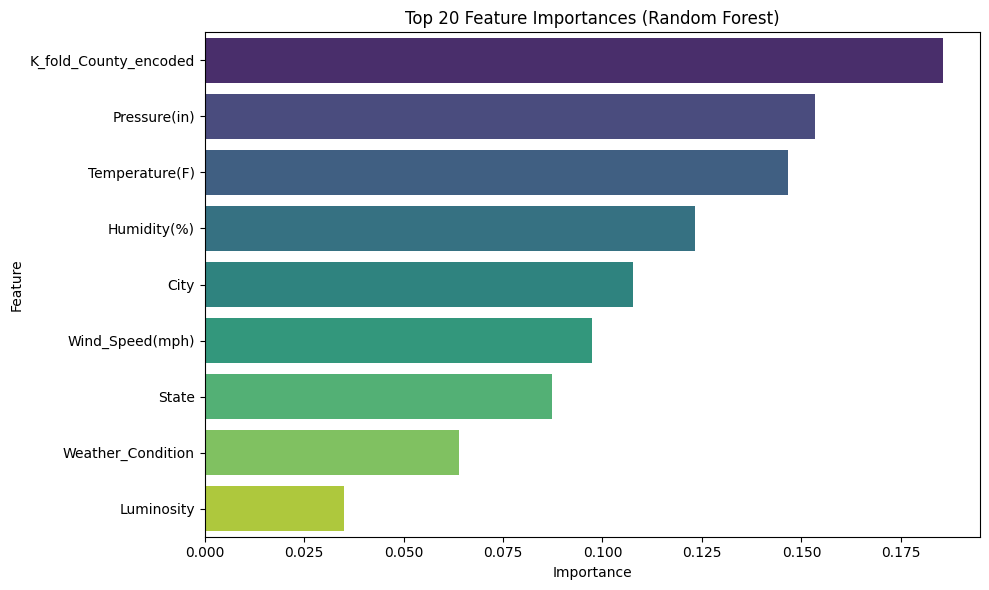

In [ ]:
importances = clf.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

# Conclusion

Autoencoder almost performed as well as just encoding the variables from the random forest.

Next step would be to use only one hot encoding for autoencoder to test the results, or to only put numerical data on it ?

# Logistic

In [ ]:
print(X_orig2.columns)

Index(['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)',
       'City', 'State', 'Weather_Condition', 'Luminosity',
       'K_fold_County_encoded'],
      dtype='object')


In [ ]:
embedding_cols = ['City', 'State', 'Weather_Condition']
low_card_cols = ['Crossing', 'Junction', 'Station', 'Stop', 'Traffic_Signal', 'Luminosity']
X_embed = pd.DataFrame()
X_low_card = pd.DataFrame()
for col in embedding_cols:
    le = LabelEncoder()
    X_embed[col] = le.fit_transform(balanced_df[col].astype(str))
    encoders[col] = le

low_card_encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
X_low_card = pd.DataFrame(
    low_card_encoder.fit_transform(balanced_df[low_card_cols]),
    columns=low_card_encoder.get_feature_names_out(low_card_cols)
)

print(X_low_card.columns)
print(X_embed.columns)

categorical_cols = pd.concat([X_embed.reset_index(drop=True), X_low_card.reset_index(drop=True)], axis=1)

X_orig = pd.concat([balanced_df[numerical_cols], categorical_cols], axis=1)  # merge
y_orig = balanced_df['Severity']

Index(['Crossing_True', 'Junction_True', 'Station_True', 'Stop_True',
       'Traffic_Signal_True', 'Luminosity_0.0', 'Luminosity_0.25',
       'Luminosity_0.5', 'Luminosity_0.75', 'Luminosity_1.0'],
      dtype='object')
Index(['City', 'State', 'Weather_Condition'], dtype='object')


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_orig)
# X_combined = pd.concat([X_orig, balanced_df['County_cleaned']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_orig, y_orig,
    test_size=0.2,
    random_state=42,
    stratify=y_orig
)

logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
print(X_train.columns)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

Index(['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'City', 'State', 'Weather_Condition',
       'Crossing_True', 'Junction_True', 'Station_True', 'Stop_True',
       'Traffic_Signal_True', 'Luminosity_0.0', 'Luminosity_0.25',
       'Luminosity_0.5', 'Luminosity_0.75', 'Luminosity_1.0'],
      dtype='object')


c:\Users\Lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression:
              precision    recall  f1-score   support

           1       0.18      0.01      0.02      8990
           2       0.48      0.99      0.64     45916
           3       0.39      0.00      0.01     23421
           4       0.00      0.00      0.00     18249

    accuracy                           0.47     96576
   macro avg       0.26      0.25      0.17     96576
weighted avg       0.34      0.47      0.31     96576



c:\Users\Lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.p

### pretty terrible as expected, since the data isn't linear

# XGBoost test

In [ ]:
numerical_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)',
                  'Visibility(mi)', 'Wind_Speed(mph)',
                  'Luminosity', 'K_fold_County_encoded']

X_orig = balanced_df[numerical_cols]
X_orig = pd.concat([X_orig, X_latent_df], axis=1)
y_orig = balanced_df['Severity']

# X_combined = pd.concat([X_orig, balanced_df['County_cleaned']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_orig, y_orig,
    test_size=0.2,
    random_state=42,
    stratify=y_orig
)

clf_xgb = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softmax',
    num_class=4,
    tree_method='hist',
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=1
)

y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

clf_xgb.fit(X_train, y_train_xgb)

y_pred_xgb = clf_xgb.predict(X_test)

y_pred_xgb += 1

c:\Users\Lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:25:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[ 3319  5277   242   152]
 [ 1375 37178  5336  2027]
 [  345 12584  8943  1549]
 [  281 11339  3058  3571]]
              precision    recall  f1-score   support

           1       0.62      0.37      0.46      8990
           2       0.56      0.81      0.66     45916
           3       0.51      0.38      0.44     23421
           4       0.49      0.20      0.28     18249

    accuracy                           0.55     96576
   macro avg       0.55      0.44      0.46     96576
weighted avg       0.54      0.55      0.52     96576



## Ordered Logistic Regression

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_orig)
# X_combined = pd.concat([X_orig, balanced_df['County_cleaned']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_orig, y_orig, test_size=0.2, random_state=42, stratify=y_orig
)

model_ord = mord.LogisticAT(alpha=1.0)
model_ord.fit(X_train, y_train)
y_pred = model_ord.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    6  8180   801     3]
 [    8 32687 13126    95]
 [    0 13292  9983   146]
 [    3  9278  8764   204]]
              precision    recall  f1-score   support

           1       0.35      0.00      0.00      8990
           2       0.52      0.71      0.60     45916
           3       0.31      0.43      0.36     23421
           4       0.46      0.01      0.02     18249

    accuracy                           0.44     96576
   macro avg       0.41      0.29      0.24     96576
weighted avg       0.44      0.44      0.37     96576

